### scipy.cluster

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Import ndimage to read the image
from scipy import ndimage

# Import cluster for clustering algorithms
from scipy import cluster

In [8]:
# Read the image
image = ndimage.imread("cluster_test_image.jpg")

/Users/umitcakmak/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


In [11]:
# Image is 1000x1000 pixels and it has 3 channels.
image.shape

(1000, 1000, 3)

In [25]:
image

array([[[30, 30, 30],
        [16, 16, 16],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [16, 16, 16],
        [29, 29, 29]],

       [[13, 13, 13],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [12, 12, 12]],

       [[16, 16, 16],
        [ 3,  3,  3],
        [ 1,  1,  1],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [16, 16, 16]],

       ...,

       [[17, 17, 17],
        [ 3,  3,  3],
        [ 1,  1,  1],
        ...,
        [34, 26, 39],
        [27, 21, 33],
        [59, 55, 69]],

       [[15, 15, 15],
        [ 2,  2,  2],
        [ 0,  0,  0],
        ...,
        [37, 31, 43],
        [34, 28, 42],
        [60, 56, 71]],

       [[33, 33, 33],
        [20, 20, 20],
        [17, 17, 17],
        ...,
        [55, 49, 63],
        [47, 43, 57],
        [65, 61, 76]]], dtype=uint8)

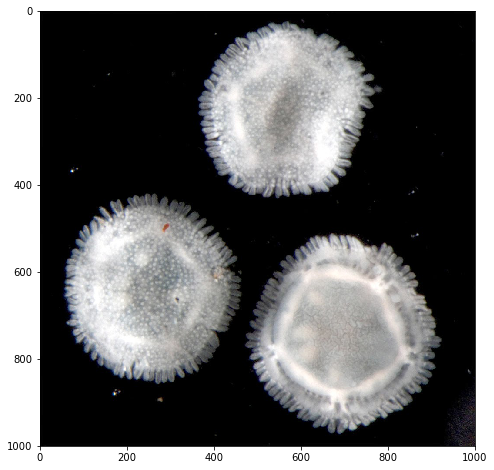

In [20]:
plt.figure(figsize = (15,8))
plt.imshow(image)

In [30]:
# Convert image array to 2-dimensional dataset
x, y, z = image.shape
image_2d = image.reshape(x*y, z).astype(float)
image_2d.shape

(1000000, 3)

In [31]:
image_2d

array([[30., 30., 30.],
       [16., 16., 16.],
       [14., 14., 14.],
       ...,
       [55., 49., 63.],
       [47., 43., 57.],
       [65., 61., 76.]])

In [92]:
# kmeans will return cluster centers and the distortion
cluster_centers, distortion = cluster.vq.kmeans(image_2d, k_or_guess=2)

In [35]:
print(cluster_centers, distortion)

[[179.28653454 179.30176248 179.44142117]
 [  3.75308484   3.83491111   4.49236356]] 26.87835069294931


In [56]:
image_2d_labeled = image_2d.copy()

In [117]:
labels = []

from scipy.spatial.distance import euclidean
import numpy as np

for i in range(image_2d.shape[0]):
    distances = [euclidean(image_2d[i], center) for center in cluster_centers]
    labels.append(np.argmin(distances))

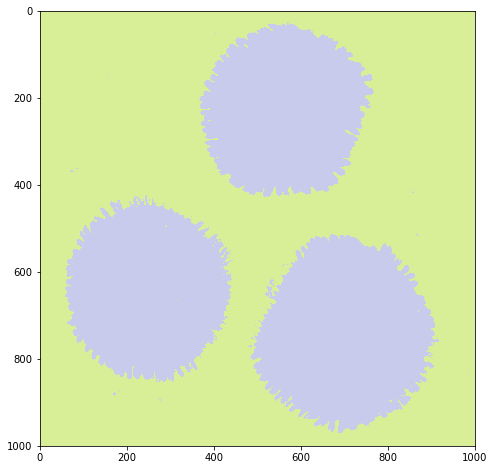

In [119]:
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[labels].reshape(x, y, z))

### scipy.fftpack

### scipy.interpolate

### scipy.linalg


### scipy.ndimage

### scipy.optimize

### scipy.signal

### scipy.stats

## Linear Regression with SciPy & NumPy

In [3]:
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt

# Boston House Prices dataset
boston = datasets.load_boston()
x = boston.data
y = boston.target

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
x.shape

(506, 13)

In [9]:
y.shape

(506,)

In [27]:
# We wil consider "lower status of population" as independent variable for its importance
lstat = x[0:,-1]

In [28]:
lstat.shape

(506,)

In [29]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(lstat, y)

In [30]:
print(slope, intercept, r_value, p_value, std_err)

-0.9500493537579909 34.55384087938311 -0.737662726174015 5.081103394387796e-88 0.03873341621263942


In [31]:
print("r-squared:", r_value**2)

r-squared: 0.5441462975864798


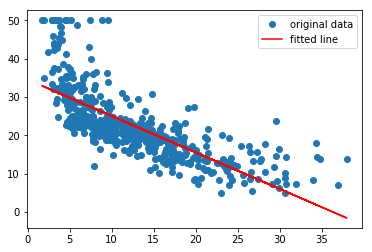

In [34]:
plt.plot(lstat, y, 'o', label='original data')
plt.plot(lstat, intercept + slope*lstat, 'r', label='fitted line')
plt.legend()
plt.show()

In [46]:
# We can also have a look at the relationship between "average number of rooms" and the house prices.
rm = x[0:,5]

In [47]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rm, y)

print(slope, intercept, r_value, p_value, std_err)

print("r-squared:", r_value**2)

9.102108981180308 -34.670620776438554 0.6953599470715394 2.48722887100781e-74 0.4190265601213402
r-squared: 0.483525455991334


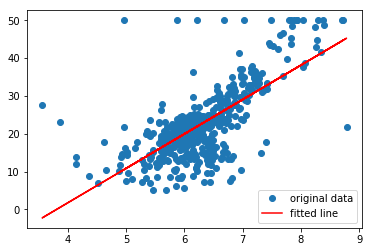

In [48]:
plt.plot(rm, y, 'o', label='original data')
plt.plot(rm, intercept + slope*rm, 'r', label='fitted line')
plt.legend()
plt.show()

## NumPy & Pandas 

In [53]:
import pandas as pd
from sklearn import datasets

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [59]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [121]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [57]:
df['Target'] = diabetes.target

In [123]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [60]:
# Descriptive statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

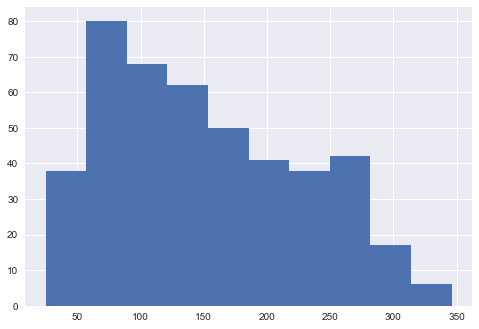

In [64]:
# Let's see how target is distibuted
plt.hist(df['Target'])

We can see that target variable is skewed to the right

In [96]:
# Since 'sex' is categorical, excluding it from numerical columns
numeric_cols = [col for col in df.columns if col != 'sex']

In [97]:
numeric_cols

['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Target']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c9df3c8>,
      dtype=object)

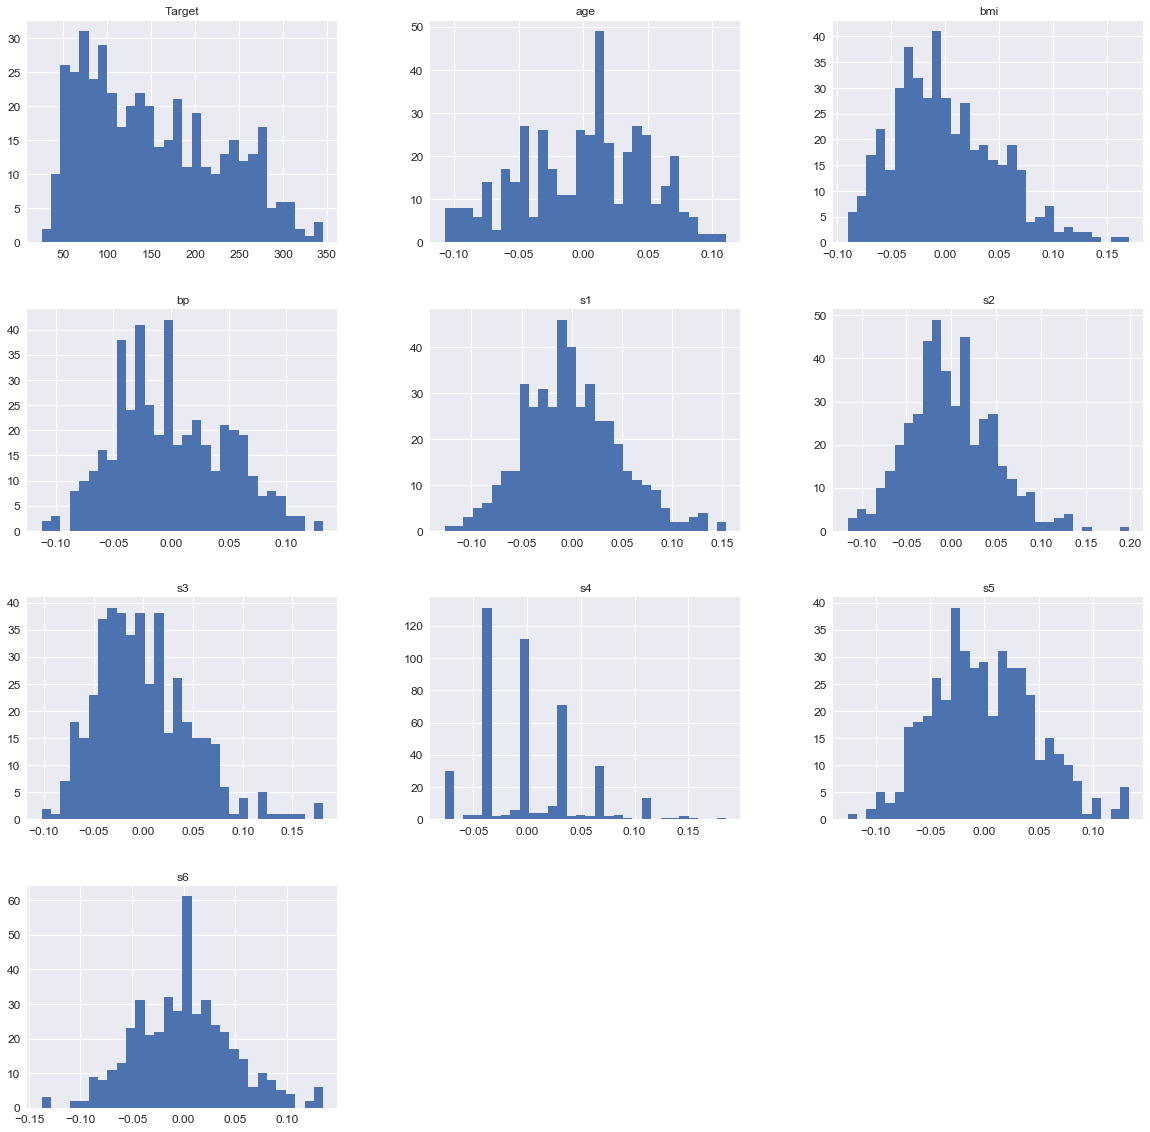

In [98]:
# You can have a look at variable distributions individually, but there's a better way
df[numeric_cols].hist(figsize=(20, 20), bins=30, xlabelsize=12, ylabelsize=12)

# You can also choose create dataframes for numerical and categorical variables

You can examine the distributions of several features and decide which of them look similar. For this example, features s1, s2, and s6 seem to have similar distribution. 

In [99]:
# corr method will give you the correlation between features
df[numeric_cols].corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
bmi,0.185085,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483
Target,0.187889,0.586450,0.441484,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


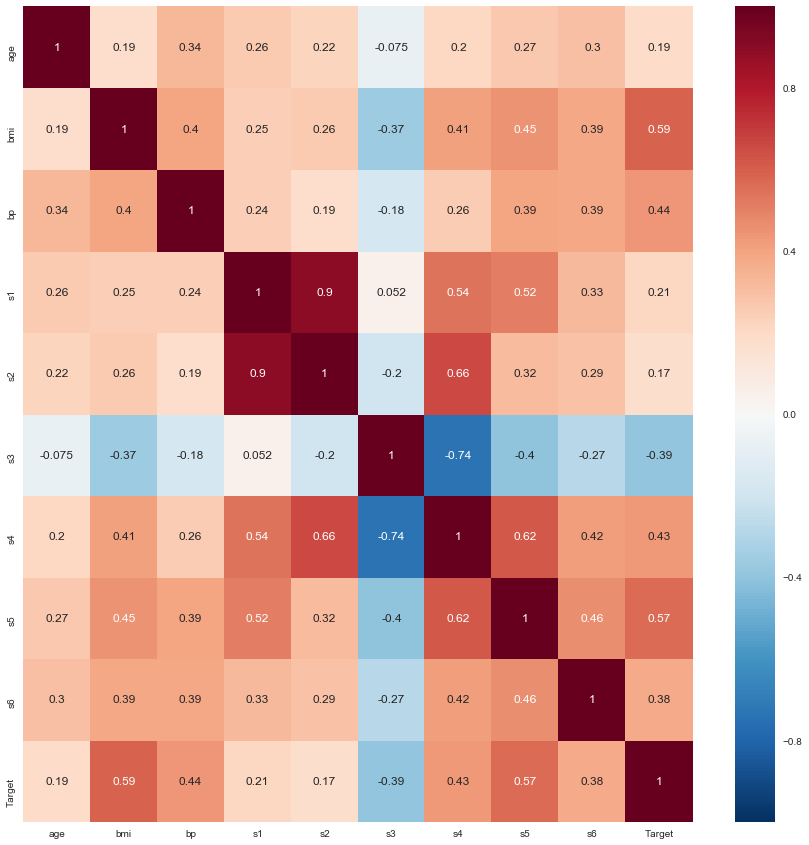

In [100]:
# You can better represent this relationship by using heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df[numeric_cols].corr(), annot=True)

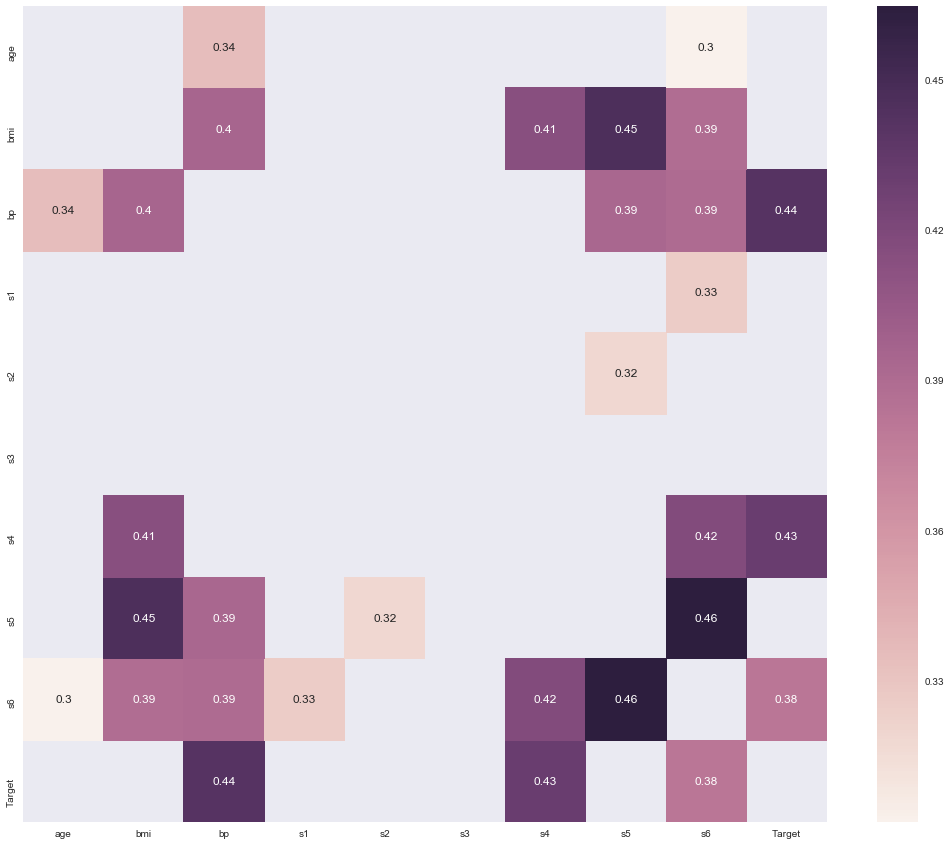

In [103]:
# You can also filter correlations the following way

plt.figure(figsize=(18, 15))
sns.heatmap(df[numeric_cols].corr()
            [(df[numeric_cols].corr() >= 0.3) & (df[numeric_cols].corr() <= 0.5)], 
            annot=True)

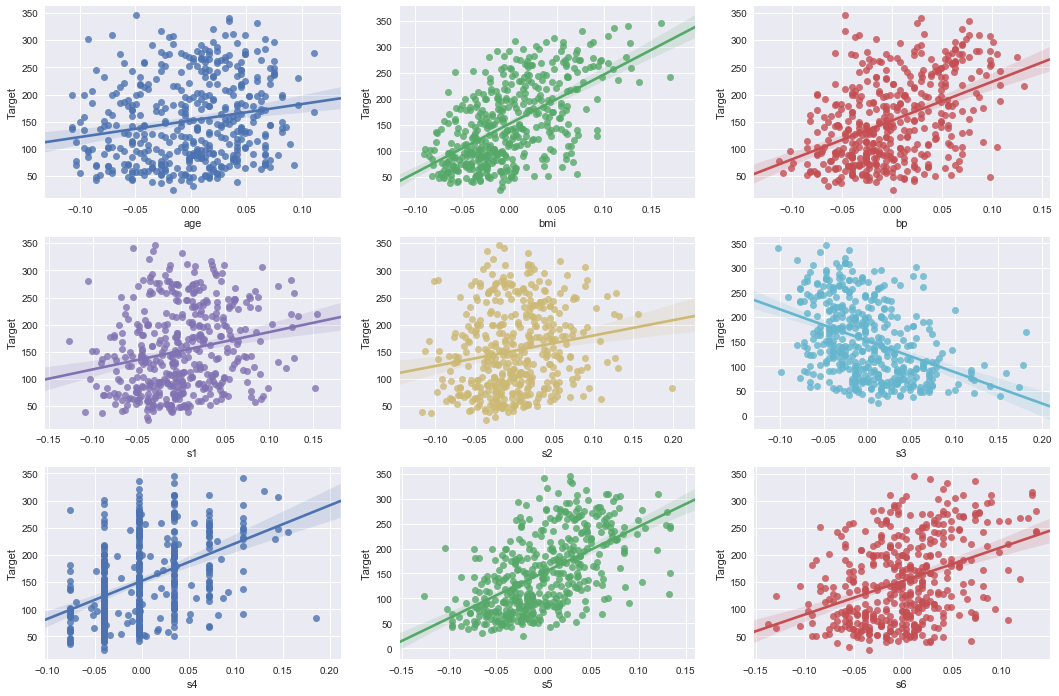

In [120]:
# There are other useful visualizations to examine relationships

fig, ax = plt.subplots(3, 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < 9:
        sns.regplot(x=df[numeric_cols[i]],y='Target', data=df, ax=ax)

## Quantitative Modelling in Stock Prices with Pandas

In [143]:
import quandl

In [144]:
msft = quandl.get('WIKI/MSFT')

In [147]:
msft.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [146]:
msft.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-27,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0


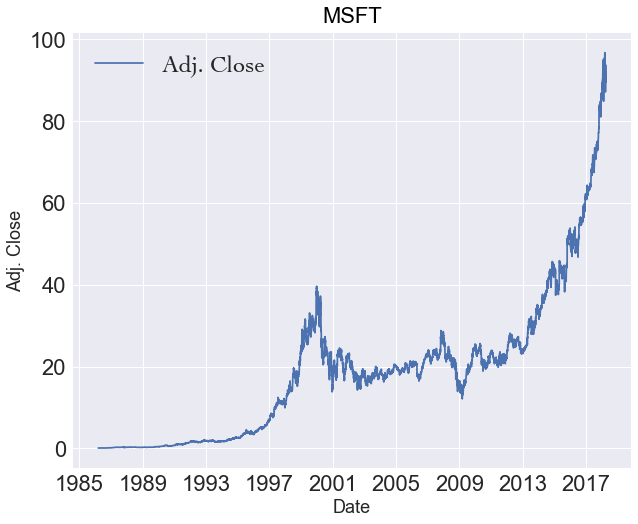

In [165]:
# Let's customize our plot with the following settings
import matplotlib.font_manager as font_manager

font_path = '/Library/Fonts/Cochin.ttc'

font_prop = font_manager.FontProperties(fname=font_path, size=24)
axis_font = {'fontname':'Arial', 'size':'18'}

title_font = {'fontname':'Arial', 'size':'22', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}

plt.figure(figsize=(10, 8))
plt.plot(msft['Adj. Close'], label='Adj. Close')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.xlabel("Date", **axis_font)
plt.ylabel("Adj. Close", **axis_font)

plt.title("MSFT", **title_font)
plt.legend(loc='upper left', prop=font_prop, numpoints=1)

plt.show()

In [175]:
# Daily change
msft['Daily Pct. Change'] = (msft['Adj. Close'] - msft['Adj. Open']) / msft['Adj. Open']

In [176]:
msft.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Pct. Change
Date,,,,,,,,,,,,,
2018-03-14,95.120,95.410,93.50,93.85,31576898.0,0.0,1.0,95.120,95.410,93.50,93.85,31576898.0,-0.013352
2018-03-15,93.530,94.580,92.83,94.18,26279014.0,0.0,1.0,93.530,94.580,92.83,94.18,26279014.0,0.006950
2018-03-16,94.680,95.380,93.92,94.60,47329521.0,0.0,1.0,94.680,95.380,93.92,94.60,47329521.0,-0.000845
2018-03-19,93.740,93.900,92.11,92.89,31752589.0,0.0,1.0,93.740,93.900,92.11,92.89,31752589.0,-0.009068
2018-03-20,93.050,93.770,93.00,93.13,21787780.0,0.0,1.0,93.050,93.770,93.00,93.13,21787780.0,0.000860
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0,-0.004842
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0,-0.016162
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0,-0.025922
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0,0.034985


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 6.000e+00, 5.000e+00,
        9.000e+00, 2.000e+01, 1.900e+01, 2.200e+01, 3.100e+01, 5.400e+01,
        9.700e+01, 1.260e+02, 1.850e+02, 2.340e+02, 3.470e+02, 4.980e+02,
        6.930e+02, 9.410e+02, 1.103e+03, 9.010e+02, 7.210e+02, 5.910e+02,
        4.220e+02, 2.860e+02, 1.860e+02, 1.560e+02, 1.150e+02, 7.600e+01,
        5.900e+01, 4.000e+01, 2.500e+01, 2.400e+01, 1.700e+01, 1.300e+01,
        6.000e+00, 9.000e+00, 5.000e+0

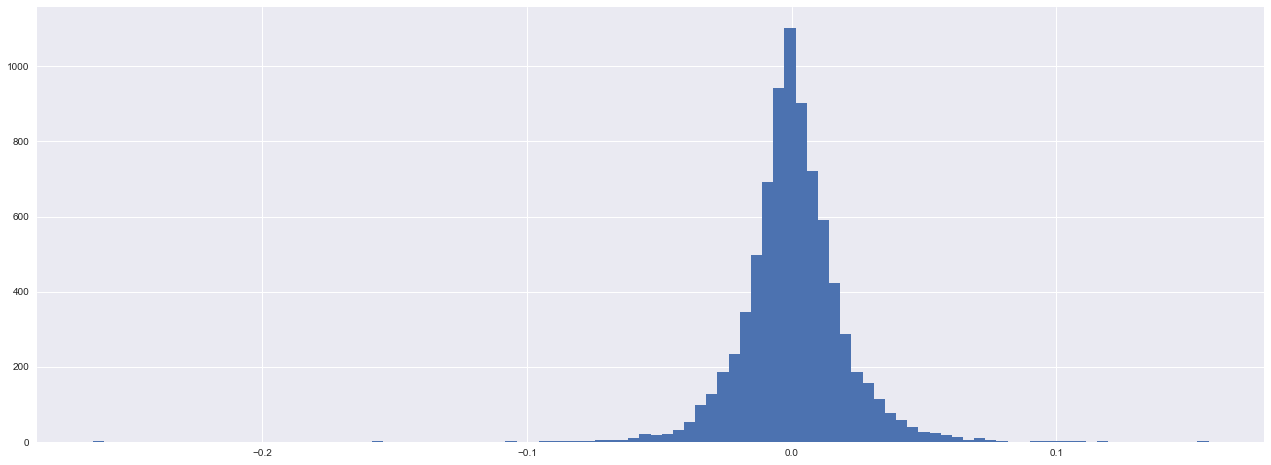

In [182]:
plt.figure(figsize=(22, 8))
plt.hist(msft['Daily Pct. Change'], bins=100)

Return distribution has long tails, especially on negative side and this is a know phenomenon in financial analysis. The risk that it creates is referred as tail risk and it breaks the assumption that market returns follow normal distribution. This basically tells you that the probability of extreme events are more likely compared to normal distribution

In terms of visualizations, it's helpful to have them interactive and plotly offers great alternative to current plotting libraries

In [189]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

from datetime import datetime
import pandas_datareader.data as web

import quandl

msft = quandl.get('WIKI/MSFT')
msft['Daily Pct. Change'] = (msft['Adj. Close'] - msft['Adj. Open']) / msft['Adj. Open']

data = [go.Scatter(x=msft.index, y=msft['Adj. Close'])]

plot(data)

'file:///Users/umitcakmak/Desktop/Numpy_Notebooks/temp-plot.html'

In [191]:
# You can create OHLC (Open-High-Low-Close) charts
trace = go.Ohlc(x=msft.index,
                open=msft['Adj. Open'],
                high=msft['Adj. High'],
                low=msft['Adj. Low'],
                close=msft['Adj. Close'])
data = [trace]
plot(data)

'file:///Users/umitcakmak/Desktop/Numpy_Notebooks/temp-plot.html'

In [192]:
# Similarly, you can create Candlestick charts
trace = go.Candlestick(x=msft.index,
                open=msft['Adj. Open'],
                high=msft['Adj. High'],
                low=msft['Adj. Low'],
                close=msft['Adj. Close'])
data = [trace]
plot(data)

'file:///Users/umitcakmak/Desktop/Numpy_Notebooks/temp-plot.html'

In [195]:
msft['Daily Pct. Change'].values

array([ 0.09803922,  0.03571429,  0.01724138, ..., -0.02592179,
        0.0349851 , -0.05761534])

In [199]:
# Distribution plot
import plotly.figure_factory as ff

fig = ff.create_distplot([msft['Daily Pct. Change'].values], ['MSFT Daily Returns'], show_hist=False)
plot(fig)

'file:///Users/umitcakmak/Desktop/Numpy_Notebooks/temp-plot.html'

In [202]:
# Create 3 moving averages
msft['200MA'] = msft['Adj. Close'].rolling(window=200).mean()
msft['100MA'] = msft['Adj. Close'].rolling(window=100).mean()
msft['50MA'] = msft['Adj. Close'].rolling(window=50).mean()

In [203]:
msft.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Pct. Change,200MA,100MA,50MA
Date,,,,,,,,,,,,,,,,
2018-03-14,95.120,95.410,93.50,93.85,31576898.0,0.0,1.0,95.120,95.410,93.50,93.85,31576898.0,-0.013352,79.764181,87.322623,91.4226
2018-03-15,93.530,94.580,92.83,94.18,26279014.0,0.0,1.0,93.530,94.580,92.83,94.18,26279014.0,0.006950,79.888837,87.492232,91.5872
2018-03-16,94.680,95.380,93.92,94.60,47329521.0,0.0,1.0,94.680,95.380,93.92,94.60,47329521.0,-0.000845,80.013416,87.663055,91.7522
2018-03-19,93.740,93.900,92.11,92.89,31752589.0,0.0,1.0,93.740,93.900,92.11,92.89,31752589.0,-0.009068,80.132266,87.807824,91.8678
2018-03-20,93.050,93.770,93.00,93.13,21787780.0,0.0,1.0,93.050,93.770,93.00,93.13,21787780.0,0.000860,80.251028,87.954794,91.9666
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0,-0.004842,80.358327,88.094965,92.0506
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0,-0.016162,80.449602,88.210525,92.0820
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0,-0.025922,80.526639,88.298691,92.0692
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0,0.034985,80.637320,88.402612,92.1832


In [208]:
# Last 2000 days will be considered

trace_adjclose = go.Scatter(
                x=msft[-2000:].index,
                y=msft[-2000:]['Adj. Close'],
                name = "Adj. Close",
                line = dict(color = '#000000'),
                opacity = 0.8)

trace_200 = go.Scatter(
                x=msft[-2000:].index,
                y=msft[-2000:]['200MA'],
                name = "200MA",
                line = dict(color = '#FF0000'),
                opacity = 0.8)

trace_100 = go.Scatter(
                x=msft[-2000:].index,
                y=msft[-2000:]['100MA'],
                name = "100MA",
                line = dict(color = '#0000FF'),
                opacity = 0.8)

trace_50 = go.Scatter(
                x=msft[-2000:].index,
                y=msft[-2000:]['50MA'],
                name = "50MA",
                line = dict(color = '#FF00FF'),
                opacity = 0.8)


data = [trace_adjclose, trace_200, trace_100, trace_50]

layout = dict(
    title = "MSFT Moving Averages: 200, 100, 50 days",
)

fig = dict(data=data, layout=layout)
plot(fig)

'file:///Users/umitcakmak/Desktop/Numpy_Notebooks/temp-plot.html'

Moving averages are used to monitor trends in financial markets. In this example, there are 3 moving averages, each has different period. You can set number of days as per your analysis for short, medium and long term trend monitoring.

When you start working with financial time series, you will quickly realize that you need aggregations based on different periods and it's super easy to do it in pandas. Following snippet will aggregate records monthly by calculating mean.

In [216]:
msft_monthly = msft.resample('M').mean()

In [217]:
msft_monthly.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Pct. Change,200MA,100MA,50MA
Date,,,,,,,,,,,,,,,,
2017-06-30,70.561364,71.014600,69.835727,70.517955,2.773277e+07,0.000000,1.0,69.834054,70.282618,69.115897,69.791092,2.773277e+07,-0.000553,61.950990,65.477445,67.593782
2017-07-31,71.843250,72.412995,71.441000,72.012500,2.256239e+07,0.000000,1.0,71.102727,71.666599,70.704623,71.270232,2.256239e+07,0.002403,63.431438,66.971306,69.281458
2017-08-31,72.715652,73.196083,72.285187,72.816957,1.864639e+07,0.016957,1.0,72.183532,72.660475,71.756218,72.284124,1.864639e+07,0.001409,65.098648,68.785956,70.822208
2017-09-30,74.365500,74.786000,73.891000,74.344500,1.835672e+07,0.000000,1.0,73.990997,74.409380,73.518887,73.970103,1.835672e+07,-0.000265,66.700094,70.590506,72.419931
2017-10-31,77.889091,78.349318,77.529773,77.939545,2.002319e+07,0.000000,1.0,77.496844,77.954753,77.139335,77.547044,2.002319e+07,0.000765,68.223272,72.157040,73.922416
2017-11-30,83.620500,84.061610,83.124875,83.675500,1.980172e+07,0.021000,1.0,83.430357,83.870554,82.936030,83.485128,1.980172e+07,0.000679,70.262112,74.611141,77.520274
2017-12-31,84.836000,85.409915,84.163255,84.758500,2.237773e+07,0.000000,1.0,84.836000,85.409915,84.163255,84.758500,2.237773e+07,-0.000846,72.340131,77.291184,81.378112
2018-01-31,89.965952,90.657486,89.372143,90.074286,2.587511e+07,0.000000,1.0,89.965952,90.657486,89.372143,90.074286,2.587511e+07,0.001250,74.734287,80.352415,85.030938
2018-02-28,91.392105,92.764974,90.055832,91.413158,3.633093e+07,0.000000,1.0,91.392105,92.764974,90.055832,91.413158,3.633093e+07,0.000513,77.324649,83.868860,88.237253


In [220]:
data = [go.Scatter(x=msft_monthly[-24:].index, y=msft_monthly[-24:]['Adj. Close'])]

plot(data)

'file:///Users/umitcakmak/Desktop/Numpy_Notebooks/temp-plot.html'

When you are inspecting relationship between features, you can use correlation matrix as previous examples. In time series, practitioners are interested in autocorrelation which shows the correlation of time series with itself. For example, you ideally expect to have periodic peaks where you have seasonality. Let's have a look at if daily percentage change has significant peaks.

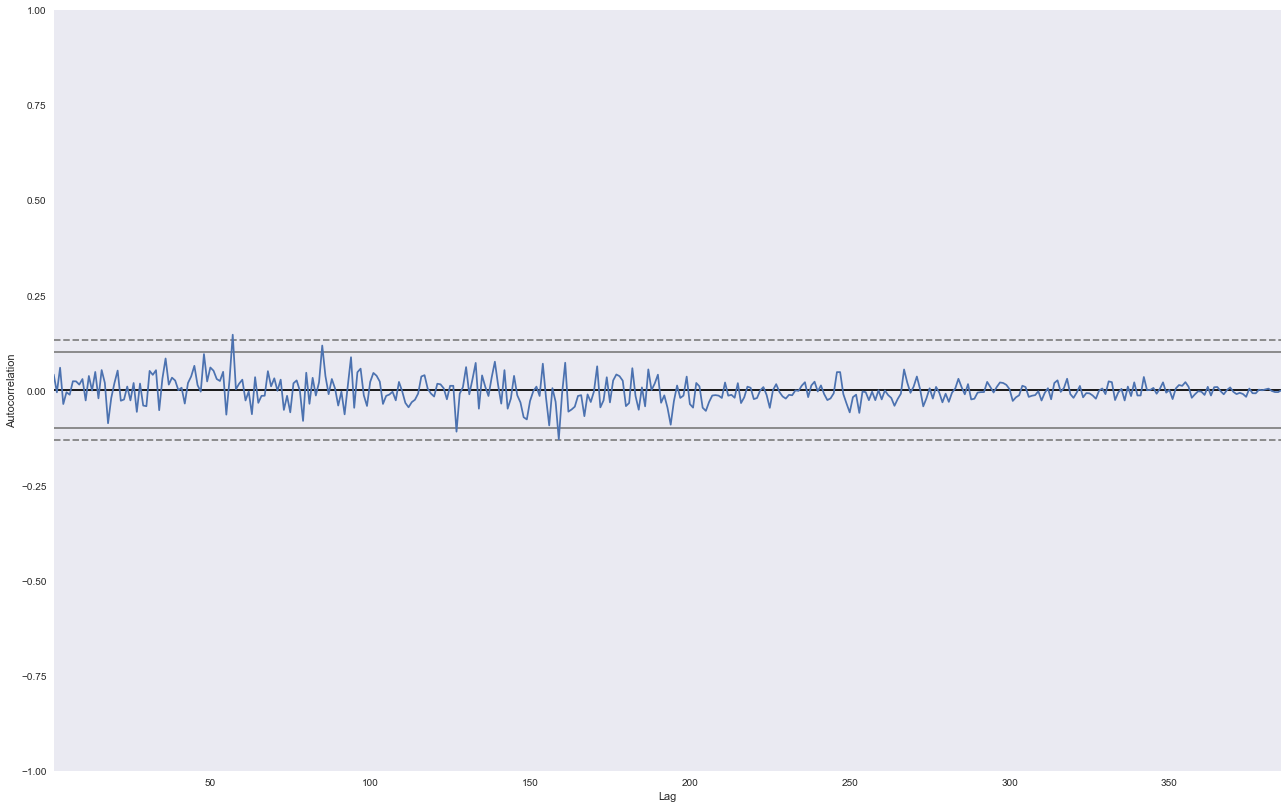

In [234]:
plt.figure(figsize=(22, 14))
pd.plotting.autocorrelation_plot(msft_monthly['Daily Pct. Change'])

There are no meaningful significant lags in this series, but if you'll try it with macro economic variables such as GDP, inflation rate, unemployment, you might observe the significant quarterly or yearly peaks 

## SciPy & Scikit-Learn 

In [235]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

diabetes = datasets.load_diabetes()


linreg = linear_model.LinearRegression()
linreg.fit(diabetes.data, diabetes.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [241]:
# You can inspect the results by looking at evaluation metrics
print('Coeff.: \n', linreg.coef_)
print("MSE: {}".format(mean_squared_error(diabetes.target, linreg.predict(diabetes.data))))

print('Variance Score: {}'.format(r2_score(diabetes.target, linreg.predict(diabetes.data))))

Coeff.: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
MSE: 2859.6903987680657
Variance Score: 0.5177494254132934


## K-Means Clustering in Housing Data with Scikit-Learn

In [242]:
from sklearn.cluster import KMeans 
from sklearn.datasets import load_boston
boston = load_boston()

In [244]:
# As previously, you have implemented the KMeans from scracth and in this example, you use sklearns API
k_means = KMeans(n_clusters=3)

In [246]:
k_means.fit(boston.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [248]:
print(k_means.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [247]:
print(k_means.cluster_centers_)

[[ 1.49558803e+01 -5.32907052e-15  1.79268421e+01  2.63157895e-02
   6.73710526e-01  6.06550000e+00  8.99052632e+01  1.99442895e+00
   2.25000000e+01  6.44736842e+02  1.99289474e+01  5.77863158e+01
   2.04486842e+01]
 [ 3.74992678e-01  1.57103825e+01  8.35953552e+00  7.10382514e-02
   5.09862568e-01  6.39165301e+00  6.04133880e+01  4.46074481e+00
   4.45081967e+00  3.11232240e+02  1.78177596e+01  3.83489809e+02
   1.03886612e+01]
 [ 1.09105113e+01  5.32907052e-15  1.85725490e+01  7.84313725e-02
   6.71225490e-01  5.98226471e+00  8.99137255e+01  2.07716373e+00
   2.30196078e+01  6.68205882e+02  2.01950980e+01  3.71803039e+02
   1.78740196e+01]]


In terms of evaluation methods such as silhouette analysis or elbow method to assess the quality of clusters and to determine right hyperparameters (k for KMeans). With simple API that sklearn provides, you will find those analysis also easy to perform and readers are strongly encouraged to extend thse examples to practice and improve their knowledge and skills.